# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Task #1

Написать Python-скрипт generate-data.py, который сгенерирует файл data.csv, содержащий 1000 строк со
следующим текстовым содержимым:

    DATE, EVENT_ID, EVENT_RESULT
    2023.04.04 12:00:00, 1, 0
    2023.04.04 15:10:01, 2, 0
    ...
    2023.05.05 23:59:02, 1000, 1

Примечания:

    – значения поля DATE должны генерироваться случайным образом в неубывающей последовательности,
    приблизительно равномерно заполняя даты с 4 апреля по 5 мая 2023 года;
    
    – значение поля EVENT_RESULT генерируется случайно следующим образом:
    «0» с вероятностью 30%,
    «1» с вероятностью 70%.

# Generate data functions

In [2]:
def generate_data(size: int = 1000, a: list = [0, 1],
                  p: list = [0.3, 0.7], data_start: str = '2023-04-04 00:00:00',
                  data_end: str = '2023-05-05 23:59:59',
                  name_csv: str = 'some_data.csv') -> pd.DataFrame:
    '''
        This function useful to generate random dataset between 2023.04.04 and 2023.05.05 with numpy and pandas.
    '''
    data = pd.DataFrame(pd.date_range(start=data_start,
                                             end=data_end, freq='S'), columns=['DATE'])\
                                            .sample(n=size)\
                                            .sort_values(by=['DATE'], ignore_index=True)
    data['EVENT_ID'] = np.arange(start=0+1, stop=size+1, step=1)
    data['EVENT_RESULT'] = np.random.choice(a=a, size=size, p=p)
    data.to_csv(name_csv, index=False)
    return data

In [3]:
generate_data()

,DATE,EVENT_ID,EVENT_RESULT
0,2023-04-04 01:29:10,1,1
1,2023-04-04 03:25:12,2,0
2,2023-04-04 04:31:46,3,1
3,2023-04-04 05:38:50,4,1
4,2023-04-04 05:41:01,5,1
...,...,...,...
995,2023-05-05 21:00:31,996,0
996,2023-05-05 21:41:44,997,0
997,2023-05-05 22:07:03,998,1
998,2023-05-05 22:41:05,999,0


In [4]:
test_df = generate_data()

# Task №2

Используя Pandasql, написать Python-скрипт table.py, который cделает SQL-запрос к файлу data.csv,
обработает его результаты и выведет на экран следующую таблицу:

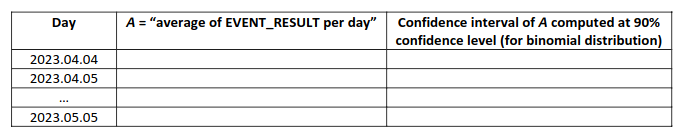

In [5]:
import pandasql as psql

In [6]:
def table(name_data: str = 'some_data.csv', query: str = 'SELECT STRFTIME("%Y.%m.%d", DATE) AS Day,\
                                                          AVG(EVENT_RESULT) AS AVERAGE_RESULT,\
                                                          1.65*sqrt(((AVG(EVENT_RESULT) - EVENT_RESULT)*(AVG(EVENT_RESULT) -                                                                 EVENT_RESULT))/COUNT(EVENT_RESULT)) AS CONFIDENT_INTERVAL\
                                                          from data\
                                                          GROUP BY Day\
                                                          ORDER BY Day ASC;') -> pd.DataFrame:
    '''
        This function via pandasql helps user read data.
        
        Note: 
            To read your data you need to specify query or by default you will get some result based on some_data.csv file.
        Args:
            name_data: file name should be in csv format
            query: your SQL query
        Return:
            pd.DataFrame
    '''
    data = psql.pd.read_csv('some_data.csv')
    return psql.sqldf(query)

In [7]:
table(query='SELECT STRFTIME("%Y.%m.%d", DATE) AS Day,\
                    AVG(EVENT_RESULT) AS A,\
                    1.65*sqrt(((AVG(EVENT_RESULT) - EVENT_RESULT)*(AVG(EVENT_RESULT) - EVENT_RESULT))/COUNT(EVENT_RESULT)) AS INTERVAL\
        from data\
        GROUP BY Day\
        ORDER BY Day ASC;')

,Day,A,INTERVAL
0,2023.04.04,0.526316,0.140876
1,2023.04.05,0.735294,0.074905
2,2023.04.06,0.642857,0.111365
3,2023.04.07,0.640000,0.211200
4,2023.04.08,0.714286,0.089092
5,2023.04.09,0.707317,0.075420
6,2023.04.10,0.741935,0.076477
7,2023.04.11,0.545455,0.156670
8,2023.04.12,0.636364,0.104447
9,2023.04.13,0.500000,0.150624


# Task №3

Используя Matplotlib или Plotly, написать Python-скрипт plot.py, который сгенерирует файл plot.png с
графиком, визуализирующим таблицу из предыдущего пункта: среднее значение А, верхняя граница
доверительного интервала, нижняя граница доверительного интервала. Приблизительный ожидаемый
результат (фактический внешний вид графика, цвета и даже тип диаграммы могут отличаться):

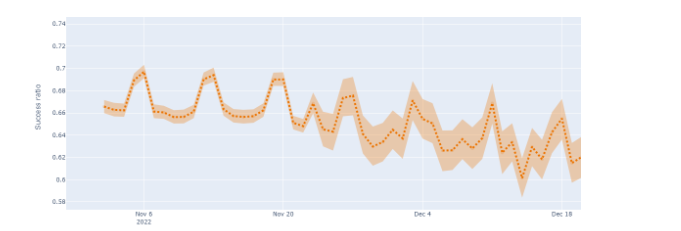

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
import table

In [9]:
def plot(name_file: str = "some_file.csv", query: str = None, name_plot: str = "plot.png") -> plt.figure():
    '''
        This function helps to plot your SQL query
        
        Note: 
            To read your data you need to specify query or by default you will get some result based on some_data.csv file.
        Args:
            name_file: file name to work with (should be in csv format)
            name_plot: file name for your plot
            query: your SQL query (not working)
        Return:
            fig.savefig("plot.png")
    '''
    
    data = table.table(name_data=name_file)
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data['Day'],data['A'])
    ax.fill_between(data['Day'], (data['A']-data['INTERVAL']),\
                    (data['A']+data['INTERVAL']), color='b', alpha=.1)
    sns.lineplot(data=data, x="Day", y="A")
    ax.set(ylim=(0, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    fig.savefig("plot.png") 

<Figure size 640x480 with 0 Axes>

/tmp/ipykernel_154071/1697866313.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


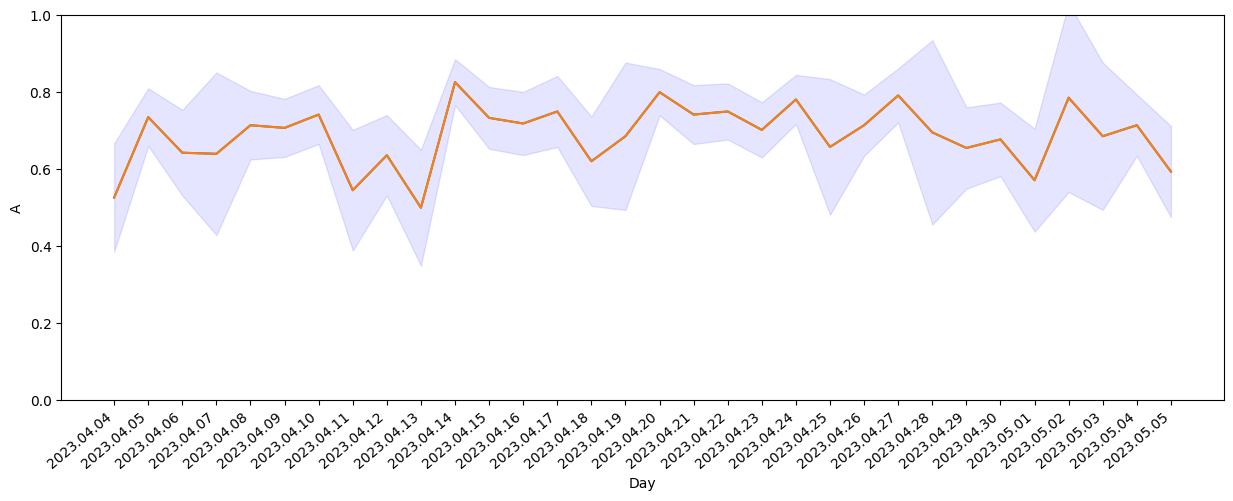

In [10]:
plot()